# Replication Workflow for danRerLib Analysis

## Introduction

This Jupyter Notebook contains the reproducible results presented in the associated publication available in this GitHub Repository (see [README](https://github.com/sdsucomptox/danrerlib) for more information on the publication). The primary objectives of this notebook are: (1) to showcase the applicability and novelty of the danRerLib Python package and (2) to offer users a step-by-step, reproducible workflow that demonstrates how to effectively utilize danRerLib for transcriptomic analysis in zebrafish research. Through this notebook, users can replicate the analyses performed in the associated publication and gain insights into the capabilities of danRerLib for their own research.

## Requirements

To run this workflow, ensure that the following Python packages are installed on your system. Most of these packages are commonly included in Python distributions, but if any are missing, you can install them using the following commands:

```
!pip install pandas
!pip install numpy
!pip install matplotlib
```

Additionally, for the danRerLib package, it can be easily installed via pip. Execute the following command to install the danRerLib package:

```
!pip install danrerlib
```

If you prefer a clean and isolated environment for this workflow, consider creating a virtual environment. Here's an example of creating a virtual environment named "myenv":

```
# Create a virtual environment
python -m venv myenv

# Activate the virtual environment
# On Windows:
.\myenv\Scripts\activate
# On macOS/Linux:
source myenv/bin/activate
```

Make sure to activate your Python environment or virtual environment before running these commands. This ensures that the packages are installed in the correct environment. If you are not familiar with virtual environments, you can refer to the [official Python documentation on virtual environments](https://docs.python.org/3/library/venv.html) for more detailed information.

## Data Preparation

The differential expression data used in this workflow was generated in a previous publication using RNA sequencing to identify genes differentially expressed following exposure to tris(4-chlorophenyl)methanol (TCPMOH) in zebrafish embryos [1]. The data is publicly available on the Gene Expression Omnibus (GEO) under the accession number GSE165920.

### Accessing the Data

To access the data, you can visit the GEO database and search for the accession number GSE165920 and download the supplementary file. The detailed description of the data can be found in the associated publication. Alternatively, for your convenience, the downloaded data used in this analysis has also been included in this repository.

## Analysis Workflow

In this workflow, we will perform functional enrichment analysis using the logistic regression method provided by the danrerlib Python package. This method leverages multiple modules within the package, streamlining the analysis process for user convenience.

### Step 1: Import Libraries

To utilize `danrerlib`, you will need to import it directly into the workspace. We will be utilizing the `enrich_logistic` function from the `enrichment` module and some visualization functions from the `enrichplots` module. To import these functions and modules only, you can do so as:

In [1]:
from danrerlib.enrichment import enrich_logistic
import danrerlib.enrichplots as ep

It is also necessary to import useful packages to help us handle the data. We will be using the `pandas` package for this:

In [2]:
import pandas as pd

### Step 2: Loading Data

Begin by loading the differential expression data into your Jupyter Notebook. You can use the following code as an example:

In [3]:
data_path = 'data/GSE165920_DMSO_vs_TCPMOH_DESeq2_Result_GeneSymbol_Verbose.txt'
df = pd.read_csv(data_path, sep = '\t')

It's crucial to examine the loaded data to ensure that the necessary information for enrichment testing is available. In the context of danRerLib, the required data includes the Gene ID, the associated log2 fold change (log2FC) and the associated p-value of differential expression. To inspect the data provided in the public dataset, we can take a closer look at the column headers:

In [4]:
# Display column headers
print(df.columns)

Index(['LLgeneID', 'LLgeneSymbol (V4.3.2.gtf)', 'LLchr', 'LLstart', 'LLend',
       'LLstrand', 'geneName', 'Ens99geneIDversion', 'EntrezGeneID',
       'ZFINgeneID', 'Base mean', 'log2(FC)', 'StdErr', 'Wald-Stats',
       'P-value', 'P-adj'],
      dtype='object')


We can see that we have the following columns that are required by `danRerLib`:
- `EntrezGeneID`: The Gene ID in NCBI format. This is an integer Gene ID.
- `log2(FC)`: The log 2 fold change for the associated genes.
- `P-adj`: The adjusted p-value for the differential expression. We chosse `P-adj` instead of `P-value` as `P-adj` correct for the multiple testing. 

We can get the necessary data by filtering the original dataframe:

In [5]:
df_necessary_data = df[['EntrezGeneID', 'P-adj', 'log2(FC)']].dropna()

To inspect what the data looks like, we can print the first few rows of the data.

In [6]:
df_necessary_data.head(5)

,EntrezGeneID,P-adj,log2(FC)
0,564531.0,2.490000e-36,-1.135762
1,560210.0,1.230000e-25,-1.050871
2,83776.0,2.500000e-22,-0.702291
3,100003999.0,1.810000e-21,-1.121619
4,541386.0,7.470000e-21,-0.830242


We can see that the Gene ID is an is reading in as a float, not an integer. This is a problem because the Entrez Gene ID as defined by NCBI is an integer. To make sure we don't run into any other issues, we can force the Gene ID column to be of integer format using the following code:

In [7]:
df_necessary_data['EntrezGeneID'] = df_necessary_data['EntrezGeneID'].astype(int)
df_necessary_data.head(5)

,EntrezGeneID,P-adj,log2(FC)
0,564531,2.490000e-36,-1.135762
1,560210,1.230000e-25,-1.050871
2,83776,2.500000e-22,-0.702291
3,100003999,1.810000e-21,-1.121619
4,541386,7.470000e-21,-0.830242


### Step 3: Perform danRerLib Analysis

We are interested in investigating the enrichment results using the Kyoto Encyclopedia of Genes and Genomes (KEGG) Pathways that have been annotated for zebrafish directly verses those that have been annotated for humans as well. A reminder that `danRerLib` defines the zebrafish organism as `dre` and the mapped zebrafish organism (defined via orthology from humans) as `dreM`. To use both the zebrafish and mapped zebrafish annotations with zebrafish annotations as the default, the organism should be `variable`.

Enrichment Analysis for Zebrafish (dre) Annotated Pathways:

In [20]:
results_dre = enrich_logistic(
             gene_universe = df_necessary_data,
             gene_id_type = 'Entrez Gene ID',
             database = 'KEGG Pathway',
             org = 'dre')

To get a quick peek at these results, we can look at the first two entries:

In [21]:
results_dre.head(2)

,Concept Type,Concept ID,Concept Name,# Genes in Concept in Universe,# Sig Genes Belong to Concept,Proportion of Sig Genes in Set,Odds Ratio,P-value,Direction
0,KEGG Pathway,dre01100,Metabolic pathways,1636,56,0.034230,0.882616,1.365810e-07,downregulated
1,KEGG Pathway,dre04744,Phototransduction,44,4,0.090909,1.602851,9.280578e-07,upregulated


Enrichment Analysis for Variable (zebrafish and human) Annotated Pathways:

In [22]:
results_variable = enrich_logistic(
             gene_universe = df_necessary_data,
             gene_id_type = 'Entrez Gene ID',
             database = 'KEGG Pathway',
             org = 'variable')

Again, to get a quick peek at these results, we can look at the first two entries:

In [11]:
results_variable.head(2)

,Concept Type,Concept ID,Concept Name,# Genes in Concept in Universe,# Sig Genes Belong to Concept,Proportion of Sig Genes in Set,Odds Ratio,P-value,Direction
0,KEGG Pathway,dreM05321,Inflammatory bowel disease,27,2,0.074074,1.723478,2.651651e-08,upregulated
1,KEGG Pathway,dre01100,Metabolic pathways,1636,56,0.034230,0.882616,1.365810e-07,downregulated


### Step 4: Interpretation

To provide a quick overview of the results and output, the following describes each column in the enrichment analysis output:

| Column Name | Description | 
| -- | -- |
| Concept Type | The database tested from, in this case it is 'KEGG Pathway'. |
| Concept ID | The ID for the concept, or pathway, from the associated Concept Type, or database. You'll notice that the concepts from using zebrafish only have a prefix of `dre` and those from the variable case sometimes have `dreM`. This means that pathway was mapped via orthology. |
| Concept Name | The name of the concept. | 
|# Genes in Concept in Universe | The number of genes in the concept that are found in the dataset provided. |
|# Sig Genes Belong to Concept |The number of significant genes in the dataset provides that are in the concept. |
| Proportion of Sig Genes in Set | The number of significant genes divided by the total number of genes in the concept |
| Odds Ratio | 	The odds ratio measures the likelihood of finding significant genes in the analyzed concept compared to the rest of the genes in the dataset. | 
| P-value | The p-value indicating the significance of the enrichment.|
| Direction | Indicates whether the genes in the concept are upregulated or downregulated in the dataset. |

We can take a look further into the top 10 upregulated and top 10 downregulated genes per methodology.

To get the top 10 upregulated for the dre case, we can execute the following code:

In [12]:
results_dre[ results_dre['Direction'] == 'upregulated' ].head(10)

,Concept Type,Concept ID,Concept Name,# Genes in Concept in Universe,# Sig Genes Belong to Concept,Proportion of Sig Genes in Set,Odds Ratio,P-value,Direction
1,KEGG Pathway,dre04744,Phototransduction,44,4,0.090909,1.602851,9.280578e-07,upregulated
5,KEGG Pathway,dre04514,Cell adhesion molecules,136,4,0.029412,1.435367,2.380382e-05,upregulated
7,KEGG Pathway,dre04510,Focal adhesion,266,3,0.011278,1.362539,4.158939e-05,upregulated
8,KEGG Pathway,dre04512,ECM-receptor interaction,96,2,0.020833,1.447483,7.423334e-05,upregulated
9,KEGG Pathway,dre03460,Fanconi anemia pathway,44,2,0.045455,1.517855,9.067474e-05,upregulated
10,KEGG Pathway,dre03030,DNA replication,36,1,0.027778,1.525694,1.638891e-04,upregulated
15,KEGG Pathway,dre04371,Apelin signaling pathway,176,4,0.022727,1.333516,1.404306e-03,upregulated
18,KEGG Pathway,dre04520,Adherens junction,136,2,0.014706,1.346207,2.234461e-03,upregulated
23,KEGG Pathway,dre03430,Mismatch repair,22,0,0.000000,1.498479,4.322494e-03,upregulated
26,KEGG Pathway,dre04340,Hedgehog signaling pathway,68,2,0.029412,1.379227,7.121923e-03,upregulated


Similarly for the variable case, we can execute a similar code:

In [13]:
results_variable[ results_variable['Direction'] == 'upregulated' ].head(10)

,Concept Type,Concept ID,Concept Name,# Genes in Concept in Universe,# Sig Genes Belong to Concept,Proportion of Sig Genes in Set,Odds Ratio,P-value,Direction
0,KEGG Pathway,dreM05321,Inflammatory bowel disease,27,2,0.074074,1.723478,2.651651e-08,upregulated
2,KEGG Pathway,dre04744,Phototransduction,44,4,0.090909,1.602851,9.280578e-07,upregulated
5,KEGG Pathway,dreM04659,Th17 cell differentiation,82,3,0.036585,1.497681,1.070231e-05,upregulated
7,KEGG Pathway,dreM04062,Chemokine signaling pathway,162,4,0.024691,1.420704,2.141994e-05,upregulated
8,KEGG Pathway,dre04514,Cell adhesion molecules,136,4,0.029412,1.435367,2.380382e-05,upregulated
10,KEGG Pathway,dre04510,Focal adhesion,266,3,0.011278,1.362539,4.158939e-05,upregulated
11,KEGG Pathway,dreM05412,Arrhythmogenic right ventricular cardiomyopathy,95,2,0.021053,1.453221,5.744453e-05,upregulated
12,KEGG Pathway,dre04512,ECM-receptor interaction,96,2,0.020833,1.447483,7.423334e-05,upregulated
13,KEGG Pathway,dreM04724,Glutamatergic synapse,138,2,0.014493,1.411380,8.361597e-05,upregulated
14,KEGG Pathway,dre03460,Fanconi anemia pathway,44,2,0.045455,1.517855,9.067474e-05,upregulated


For downregulated pathways, you can run similar code again:

In [14]:
results_dre[ results_dre['Direction'] == 'downregulated' ].head(10)

,Concept Type,Concept ID,Concept Name,# Genes in Concept in Universe,# Sig Genes Belong to Concept,Proportion of Sig Genes in Set,Odds Ratio,P-value,Direction
0,KEGG Pathway,dre01100,Metabolic pathways,1636,56,0.034230,0.882616,1.365810e-07,downregulated
2,KEGG Pathway,dre03008,Ribosome biogenesis in eukaryotes,74,12,0.162162,0.837187,2.418068e-06,downregulated
3,KEGG Pathway,dre03040,Spliceosome,139,3,0.021583,0.852358,4.297048e-06,downregulated
4,KEGG Pathway,dre04141,Protein processing in endoplasmic reticulum,199,10,0.050251,0.865868,1.641649e-05,downregulated
6,KEGG Pathway,dre01240,Biosynthesis of cofactors,177,14,0.079096,0.866998,3.145332e-05,downregulated
11,KEGG Pathway,dre02010,ABC transporters,44,7,0.159091,0.850628,1.988699e-04,downregulated
12,KEGG Pathway,dre00830,Retinol metabolism,69,8,0.115942,0.861719,3.202418e-04,downregulated
13,KEGG Pathway,dre00860,Porphyrin metabolism,47,5,0.106383,0.858490,6.865041e-04,downregulated
14,KEGG Pathway,dre00980,Metabolism of xenobiotics by cytochrome P450,55,5,0.090909,0.862075,7.290414e-04,downregulated
16,KEGG Pathway,dre00982,Drug metabolism - cytochrome P450,53,4,0.075472,0.866295,1.722917e-03,downregulated


In [15]:
results_variable[ results_variable['Direction'] == 'downregulated' ].head(10)

,Concept Type,Concept ID,Concept Name,# Genes in Concept in Universe,# Sig Genes Belong to Concept,Proportion of Sig Genes in Set,Odds Ratio,P-value,Direction
1,KEGG Pathway,dre01100,Metabolic pathways,1636,56,0.034230,0.882616,1.365810e-07,downregulated
3,KEGG Pathway,dre03008,Ribosome biogenesis in eukaryotes,74,12,0.162162,0.837187,2.418068e-06,downregulated
4,KEGG Pathway,dre03040,Spliceosome,139,3,0.021583,0.852358,4.297048e-06,downregulated
6,KEGG Pathway,dre04141,Protein processing in endoplasmic reticulum,199,10,0.050251,0.865868,1.641649e-05,downregulated
9,KEGG Pathway,dre01240,Biosynthesis of cofactors,177,14,0.079096,0.866998,3.145332e-05,downregulated
19,KEGG Pathway,dre02010,ABC transporters,44,7,0.159091,0.850628,1.988699e-04,downregulated
20,KEGG Pathway,dre00830,Retinol metabolism,69,8,0.115942,0.861719,3.202418e-04,downregulated
23,KEGG Pathway,dre00860,Porphyrin metabolism,47,5,0.106383,0.858490,6.865041e-04,downregulated
25,KEGG Pathway,dre00980,Metabolism of xenobiotics by cytochrome P450,55,5,0.090909,0.862075,7.290414e-04,downregulated
28,KEGG Pathway,dreM05204,Chemical carcinogenesis - DNA adducts,23,2,0.086957,0.848803,1.316710e-03,downregulated


You will notice that the results in the variable case are slightly different than the dre case alone. This is because we also tested for pathways that are not annotated for zebrafish using orthology built into `danRerLib`. For a detailed description of the biological underpinnings of these findings, please refer to the publication. 

### Step 5: Visualization

We can create some plots to visualize the up and downregulated pathways for each methodology. To do so, we use the `enrich_plots` module which we imported earlier as `ep`. There are a couple of different plotting options available. I will begin by showing the plots utilized in the publication:

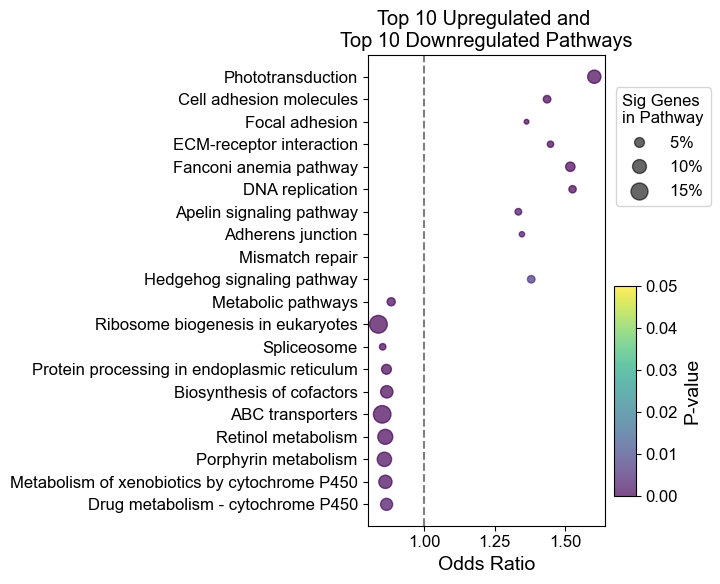

In [16]:
ep.dotplot(results_dre, 20, 'both')

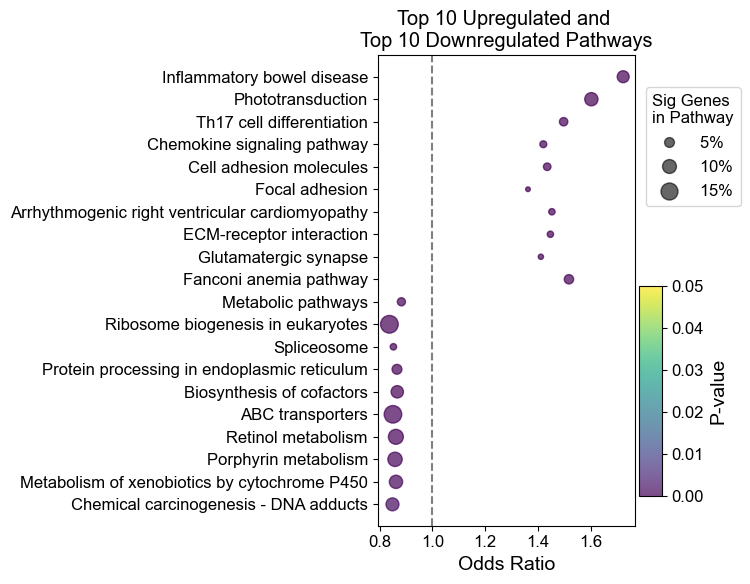

In [17]:
ep.dotplot(results_variable, 20, 'both')

To show some of the other plotting options, here are some other useful plots you can generate using `danRerLib`:

A volcano plot showing the significantly upregulated and downregulated pathways:

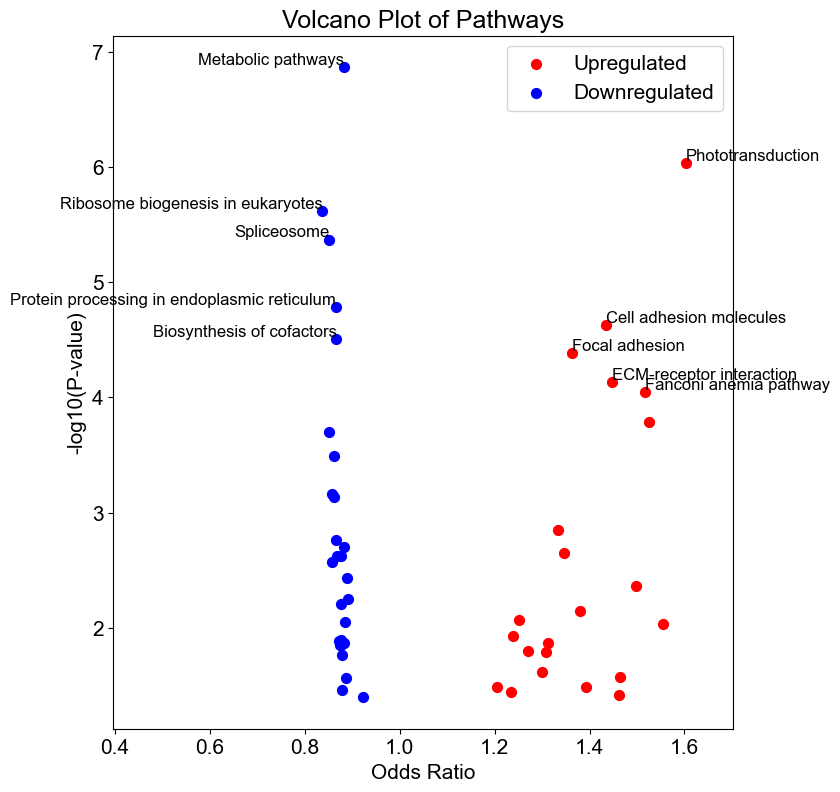

In [18]:
ep.volcano(results_dre, legend_loc='best')

A bar chart showing the top 10 upregulated pathways and the strength of the significance:

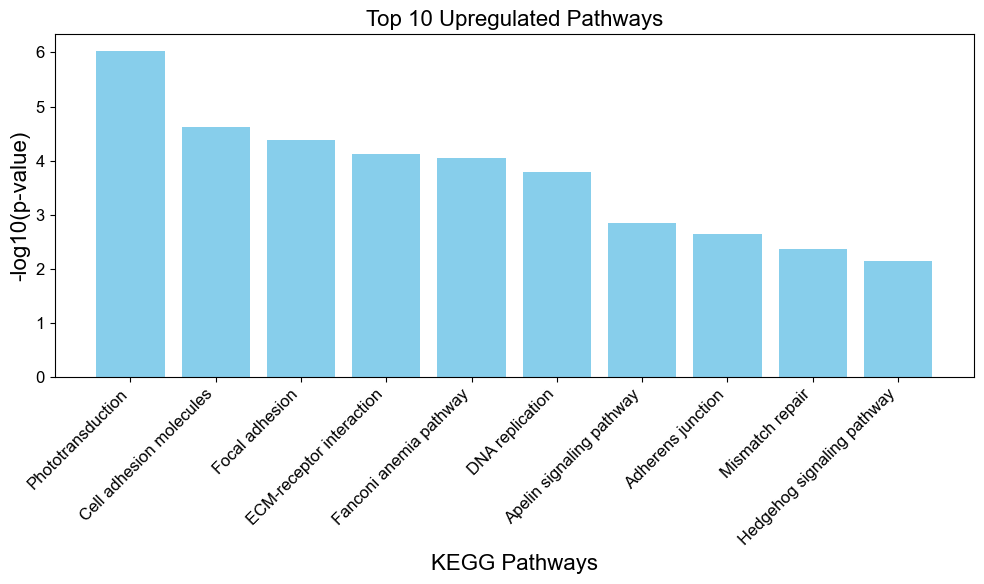

In [19]:
upregulated_pathways_dre = results_dre[ results_dre['Direction']=='upregulated' ]
ep.bar_chart(data = upregulated_pathways_dre, 
             title = 'Top 10 Upregulated Pathways', 
             xlab = 'KEGG Pathways', 
             max_num_pathways=10)

## Conclusion

`danRerLib` is a specialized and efficient tool tailored for zebrafish researchers engaging in functional enrichment analysis within Python. Through this tutorial and the associated publication, `danRerLib` can overcome the limitations of the lack of direct zebrafish annotations. Through the integration of orthology, the package enables researchers to delve into unannotated pathways, providing valuable insights.

## References

[1]: Navarrete, J., et al. The ecotoxicological contaminant tris(4-chlorophenyl)methanol (TCPMOH) impacts embryonic development in zebrafish (Danio rerio). _Aquatic Toxicology_. 2021;235:105815.

